# Exploratory Data Analysis

org: **D4G**  project: **BGCO**  task: **exploratory data analysis**

data: labeled (engage vs. static) dataset highlighting changes in member engagement (visits per week) between first and year of engagement

## Prep the environment

In [1]:
import pandas as pd  # used to manipulate dataframes
import numpy as np # used to manipulate series

import seaborn as sns  # needed for visualing
import matplotlib.pyplot as plt  # needed for visualing

## Data Wrangling

### Load Data

In [21]:
# read in the dataframe
df_001 = pd.read_csv("D4G_BGCO_Churn_Labeled_ForEDA.csv", encoding = "cp1252")

In [22]:
df = df_001

In [23]:
print("The training set has {0} rows and {1} columns".format(df.shape[0], df.shape[1]))

The training set has 2234 rows and 12 columns


In [24]:
df.head()

,d4g_member_id,label,first_year,member_location,postal_code,sex,d4g_school_id,grade,Y1_Age,checkin_total,age_category,season_most
0,-2145542991,static,2013,BRIT,K2H 8S5,F,26,9.0,10,19,junior,winter
1,-2145245024,static,2015,RID,NaN,M,-1,0.0,17,1,senior,winter
2,-2143641867,engaged,2009,BRIT,K2B 8A3,M,37,12.0,11,12,intermediate,winter
3,-2140123971,static,2013,PYC,K2E 6J5,M,17,9.0,15,1,senior,winter
4,-2140034903,static,2009,PYC,K2J 0N1,M,67,9.0,7,8,junior,winter


In [25]:
df.columns

Index(['d4g_member_id', 'label', 'first_year', 'member_location',
       'postal_code', 'sex', 'd4g_school_id', 'grade', 'Y1_Age',
       'checkin_total', 'age_category', 'season_most'],
      dtype='object')

### Organise Features

In [26]:
categorical_features = ['member_location', 'postal_code', 'sex', 'age_category', 'season_most']

numerical_features = ['first_year', 'd4g_school_id', 'grade', 'Y1_Age', 'checkin_total']

target = ['label']

## Numerical Features

In [27]:
df[numerical_features].describe()

,first_year,d4g_school_id,grade,Y1_Age,checkin_total
count,2234.000000,2234.000000,2223.000000,2234.000000,2234.000000
mean,2013.746643,119.914503,6.224471,10.756043,10.514324
std,2.808454,113.570211,3.558246,3.214669,10.318008
min,2009.000000,-1.000000,0.000000,0.000000,1.000000
25%,2012.000000,21.000000,3.000000,8.000000,2.000000
50%,2014.000000,85.000000,6.000000,11.000000,7.000000
75%,2016.000000,186.750000,9.000000,13.000000,16.000000
max,2018.000000,368.000000,12.000000,20.000000,39.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208392C70B8>,
      dtype=object)

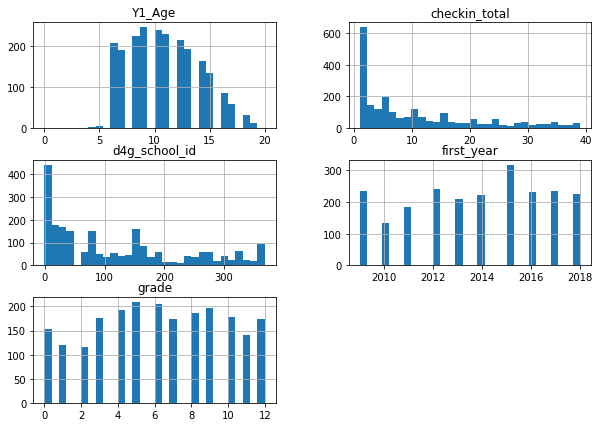

In [28]:
df[numerical_features].hist(bins=30, figsize=(10, 7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002083961EC88>,
      dtype=object)

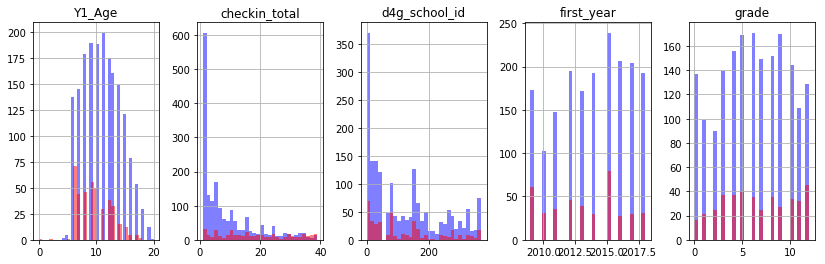

In [29]:
fig, ax = plt.subplots(1, 5, figsize=(14, 4))
df[df.label == "static"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.label == "engaged"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)